# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px #using this to plot the map

# Data mining


In [2]:
df = pd.read_csv('/content/clustering_data.csv')
df.head()

<ipython-input-2-1d6540901900>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/clustering_data.csv')


,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
0,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Peddakotla B.O,515631.0,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5689,77.85624
1,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Pinnadhari B.O,515631.0,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5281,77.857014
2,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Yerraguntapalle B.O,515631.0,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.561111,77.85715
3,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Obulareddipalli B.O,515581.0,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.2488,78.2588
4,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Odulapalli B.O,515581.0,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.24555,78.2477


In [3]:
def filter_and_reset_index(df, state_name):
    filtered_df = df[df['StateName'] == state_name]
    filtered_df = filtered_df.reset_index(drop=True)
    filtered_df.index = filtered_df.index + 1

    return filtered_df


In [4]:
karnataka_df = filter_and_reset_index(df, 'KARNATAKA')
karnataka_df #extracting just the karnatakas data

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
1,Karnataka Circle,North Karnataka Region,Bidar Division,MANHALLI S.O,585447.0,PO,Delivery,BIDAR,KARNATAKA,17.8155,76.7971
2,Karnataka Circle,North Karnataka Region,Bidar Division,Aliabad B.O,585404.0,BO,Delivery,BIDAR,KARNATAKA,17.6258,78.5955
3,Karnataka Circle,South Karnataka Region,Mangaluru Division,Bajal S.O,575009.0,PO,Delivery,DAKSHINA KANNADA,KARNATAKA,12.853372,74.878526
4,Karnataka Circle,South Karnataka Region,Hassan Division,Aggunda B.O,573103.0,BO,Delivery,HASSAN,KARNATAKA,13.32,76.27
5,Karnataka Circle,South Karnataka Region,Hassan Division,Amaragiri Tirupathi B.O,573103.0,BO,Delivery,HASSAN,KARNATAKA,13.33,76.27
...,...,...,...,...,...,...,...,...,...,...,...
6590,Karnataka Circle,South Karnataka Region,Tumakuru Division,Syagadadu B.O,572137.0,BO,Delivery,TUMAKURU,KARNATAKA,13.740787,76.9525525
6591,Karnataka Circle,South Karnataka Region,Tumakuru Division,Yeliyur B.O,572137.0,BO,Delivery,TUMAKURU,KARNATAKA,12.944455,77.1045458
6592,Karnataka Circle,South Karnataka Region,Tumakuru Division,SIT Campus B.O,572102.0,BO,Non Delivery,TUMAKURU,KARNATAKA,13.25847,77.3343088
6593,Karnataka Circle,South Karnataka Region,Tumakuru Division,Dasalakunte B.O,572138.0,BO,Delivery,TUMAKURU,KARNATAKA,13.856559,76.7954958


# Data cleaning

In [5]:
def remove_unwanted(df, columns_to_remove):
    df = df.drop(columns=columns_to_remove)
    return df

In [11]:
karantaka_df = remove_unwanted(karnataka_df, ['CircleName','StateName']) #since dono ske values throughout dataset constant hai

In [12]:
karnataka_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6594 entries, 1 to 6594
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CircleName    6594 non-null   object 
 1   RegionName    6594 non-null   object 
 2   DivisionName  6594 non-null   object 
 3   OfficeName    6594 non-null   object 
 4   Pincode       6594 non-null   float64
 5   OfficeType    6594 non-null   object 
 6   Delivery      6594 non-null   object 
 7   District      6594 non-null   object 
 8   StateName     6594 non-null   object 
 9   Latitude      5287 non-null   float64
 10  Longitude     5638 non-null   float64
dtypes: float64(3), object(8)
memory usage: 566.8+ KB


In [9]:
float_cols = ['Latitude','Longitude']
for col in float_cols:
    karnataka_df[col] = karnataka_df[col].str.extract('(\d+\.\d+)', expand=False)  # to numeric just the part

karnataka_df[float_cols] = karnataka_df[float_cols].astype('float')

In [10]:
karnataka_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6594 entries, 1 to 6594
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CircleName    6594 non-null   object 
 1   RegionName    6594 non-null   object 
 2   DivisionName  6594 non-null   object 
 3   OfficeName    6594 non-null   object 
 4   Pincode       6594 non-null   float64
 5   OfficeType    6594 non-null   object 
 6   Delivery      6594 non-null   object 
 7   District      6594 non-null   object 
 8   StateName     6594 non-null   object 
 9   Latitude      5287 non-null   float64
 10  Longitude     5638 non-null   float64
dtypes: float64(3), object(8)
memory usage: 566.8+ KB


In [13]:
karnataka_df = karnataka_df.drop_duplicates(subset=['Latitude', 'Longitude'])

In [35]:
karnataka_df['District'].value_counts()

District
BELAGAVI            584
KALABURAGI          363
BALLARI             357
HASSAN              345
VIJAYAPURA          326
CHITRADURGA         264
DAKSHINA KANNADA    261
CHIKKAMAGALURU      248
HAVERI              207
KOPPAL              179
KOLAR               167
YADGIR              161
DAVANGERE           161
RAMANAGARA          158
KODAGU              154
DHARWAD             148
CHIKKABALLAPURA     144
UTTARA KANNADA      136
GADAG               133
TUMAKURU            120
RAICHUR             119
BENGALURU RURAL     117
SHIVAMOGGA          108
BAGALKOTE            91
UDUPI                80
BENGALURU URBAN      76
BIDAR                 4
MYSURU                3
CHAMARAJANAGARA       2
MANDYA                1
Name: count, dtype: int64

In [36]:
t = karnataka_df['District'].unique()
len(t)#this means karnataka is divided into 30 districts

30

In [14]:
def fill_missing_lat_long(df, group_col, lat_col='Latitude', long_col='Longitude'): #filling the missing values of latitude and longitude as the avg value of it's corresponding division
    df_latnotnull = df.dropna(subset=[lat_col])
    df_longnotnull = df.dropna(subset=[long_col])
    df_null = df[df[lat_col].isna() | df[long_col].isna()]
    for index, row in df_null.iterrows():
        # Fill missing latitude
        if pd.isna(row[lat_col]):
            mean_lat = df_latnotnull[df_latnotnull[group_col] == row[group_col]][lat_col].mean()
            df.at[index, lat_col] = mean_lat

        # Fill missing longitude
        if pd.isna(row[long_col]):
            mean_long = df_longnotnull[df_longnotnull[group_col] == row[group_col]][long_col].mean()
            df.at[index, long_col] = mean_long

    return df


In [15]:
karnataka_df_cleaned = fill_missing_lat_long(karnataka_df, 'DivisionName')

In [16]:
fig = px.scatter_mapbox(
    karnataka_df,
    lat='Latitude',
    lon='Longitude',
    zoom=2,
    mapbox_style='open-street-map'
)

# Show the map
fig.show()

# Pruning outliers using boxplots

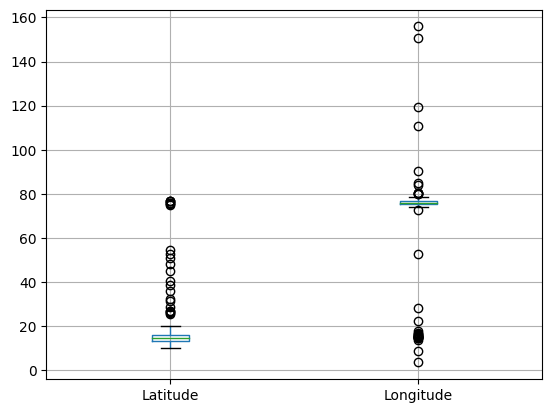

In [17]:
#we can clearly see that there are a lot of outliers
karnataka_df.boxplot(column=['Latitude','Longitude'])
plt.show()

In [18]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [19]:
karnataka_df_cleaned = remove_outliers(karnataka_df, 'Latitude')
karnataka_df_cleaned = remove_outliers(karnataka_df_cleaned, 'Longitude')

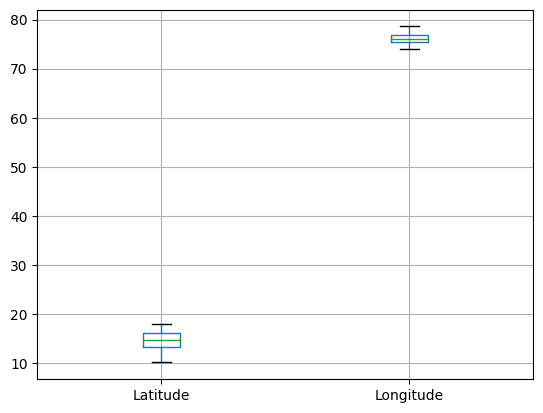

In [20]:
karnataka_df_cleaned.boxplot(column=['Latitude','Longitude'])
plt.show()

In [22]:
fig = px.scatter_mapbox(
    karnataka_df_cleaned,
    lat='Latitude',
    lon='Longitude',
    zoom=5,
    mapbox_style='open-street-map'
)

# Show the map
fig.show()

#Pruning using assingning my state a boundary box and then removing everything outside it

In [ ]:
#to further remove the outliers I will be considering karnataka as a box and anything outside of the box will be removed.
#the coordinated of the box will be ranging from Latitude: 11.5 to 18.5 and Longitude: 74 to 78.5

In [25]:
def remove_outside_karnataka(df, lat_col='Latitude', long_col='Longitude'):

    karnataka_lat_bounds = (11.5, 18.5)
    karnataka_long_bounds = (74, 78.5)

    df_filtered = df[
        (df[lat_col] >= karnataka_lat_bounds[0]) & (df[lat_col] <= karnataka_lat_bounds[1]) &
        (df[long_col] >= karnataka_long_bounds[0]) & (df[long_col] <= karnataka_long_bounds[1])
    ]

    return df_filtered

In [26]:
karnataka_df_cleaned = remove_outside_karnataka(karnataka_df_cleaned)

In [27]:
fig = px.scatter_mapbox(
    karnataka_df_cleaned,
    lat='Latitude',
    lon='Longitude',
    zoom=5,
    mapbox_style='open-street-map'
)

# Show the map
fig.show()

# Last layer of filtering.
We see that for some given latitude a few corresponding longitudes are present with very little difference between each. This is most likely an error and hence we will be removing these

In [28]:
threshold = 0.001
def filter_small_longitude_diff(df, threshold):
    filtered_rows = []
    for lat, group in df.groupby('Latitude'):
        prev_long = None
        for index, row in group.iterrows():
            if prev_long is not None:
                diff = abs(row['Longitude'] - prev_long)
                if diff >= threshold:
                    filtered_rows.append(index)
            prev_long = row['Longitude']
    return df.drop(filtered_rows)

karnataka_df_cleaned = filter_small_longitude_diff(karnataka_df_cleaned, threshold)


In [30]:
fig = px.scatter_mapbox(
    karnataka_df_cleaned,
    lat='Latitude',
    lon='Longitude',
    zoom=5,
    mapbox_style='open-street-map'
)
fig.show()

# Clustering using Kmeans from sklearn

In [31]:
from sklearn.cluster import KMeans

In [37]:
def perform_clustering(df, k):
    X = df[['Latitude', 'Longitude']].values
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    df['Cluster'] = kmeans.fit_predict(X)
    return df, kmeans

In [40]:
k = 5
df_clustered, kmeans = perform_clustering(karnataka_df_cleaned, k)
fig = px.scatter_mapbox(df_clustered, lat="Latitude", lon="Longitude", color="Cluster",
                        color_discrete_sequence=px.colors.qualitative.Set1,
                        zoom=3, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title=f"KMeans Clustering with {k} clusters")
fig.show()

In [42]:
k = 10
df_clustered, kmeans = perform_clustering(karnataka_df_cleaned, k)
fig = px.scatter_mapbox(df_clustered, lat="Latitude", lon="Longitude", color="Cluster",
                        color_discrete_sequence=px.colors.qualitative.Set1,
                        zoom=3, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title=f"KMeans Clustering with {k} clusters")
fig.show()

In [41]:
k = 30
df_clustered, kmeans = perform_clustering(karnataka_df_cleaned, k)
fig = px.scatter_mapbox(df_clustered, lat="Latitude", lon="Longitude", color="Cluster",
                        color_discrete_sequence=px.colors.qualitative.Set1,
                        zoom=3, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title=f"KMeans Clustering with {k} clusters")
fig.show()

**Clearly the map with the k = 30 looks much more tightly bounded, meaning almost every point is inside a cluster. This indirectly means that the distribution of post offices is based on districts. Har ek district level pe postoffices bante hai**

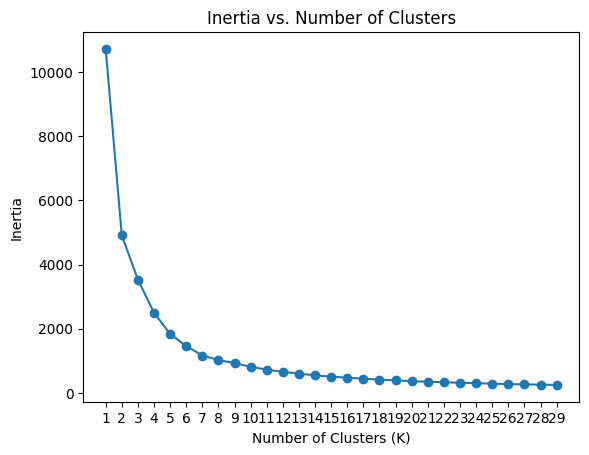

In [45]:
ks = range(1, 30)
inertias = []
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init = 5)
    kmeans.fit(karnataka_df_cleaned[['Latitude', 'Longitude']])
    inertias.append(kmeans.inertia_)

# Plotting the inertia values
plt.plot(ks, inertias, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')
plt.xticks(ks)
plt.show()

Iniertia suggests that the value of K should be around 15

In [46]:
k = 15
df_clustered, kmeans = perform_clustering(karnataka_df_cleaned, k)
fig = px.scatter_mapbox(df_clustered, lat="Latitude", lon="Longitude", color="Cluster",
                        color_discrete_sequence=px.colors.qualitative.Set1,
                        zoom=3, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title=f"KMeans Clustering with {k} clusters")
fig.show()

Even while using elbow method we get 15, which basically suggests that about every 2 districts merged together gives us somewhat of a distribution for our postoffices

# Self implimented K-means

In [50]:
def initialize_centroids(X, k):   #for initializeing centroidds
    np.random.seed(0)
    random_indices = np.random.permutation(X.shape[0])
    centroids = X[random_indices[:k]]
    return centroids

In [51]:
def assign_clusters(X, centroids):   #for assigning clusters to the points
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

In [52]:
def update_centroids(X, labels, k):  #to change the centroids to updated locatoin
    centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return centroids

In [53]:
def kmeans(X, k, max_iters=250):
    centroids = initialize_centroids(X, k)
    for i in range(max_iters):
        old_centroids = centroids
        labels = assign_clusters(X, centroids)
        centroids = update_centroids(X, labels, k)
        if np.all(old_centroids == centroids):
            break
    return centroids, labels

In [49]:
X = karnataka_df_cleaned[['Latitude', 'Longitude']].values

k = 30 #k which you want
centroids, labels = kmeans(X, k)

karnataka_df_cleaned['Cluster'] = labels


#ploty to plot the clusters with colours for better analysis
fig = px.scatter_mapbox(karnataka_df_cleaned, lat="Latitude", lon="Longitude", color="Cluster",
                        color_continuous_scale=px.colors.qualitative.Set1,
                        zoom=5, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title=f"KMeans Clustering with {k} clusters")
fig.show()


# Final verdict:
**See below the results of clustring as k = no.of districts and the map of districts of karnataka**

*  post offices are distributed on bases of districts. ie the density of post offices is defined within the district. Or sometimes a mixture of 1-2 closeby arranged districts
*   Data was cleaned properly



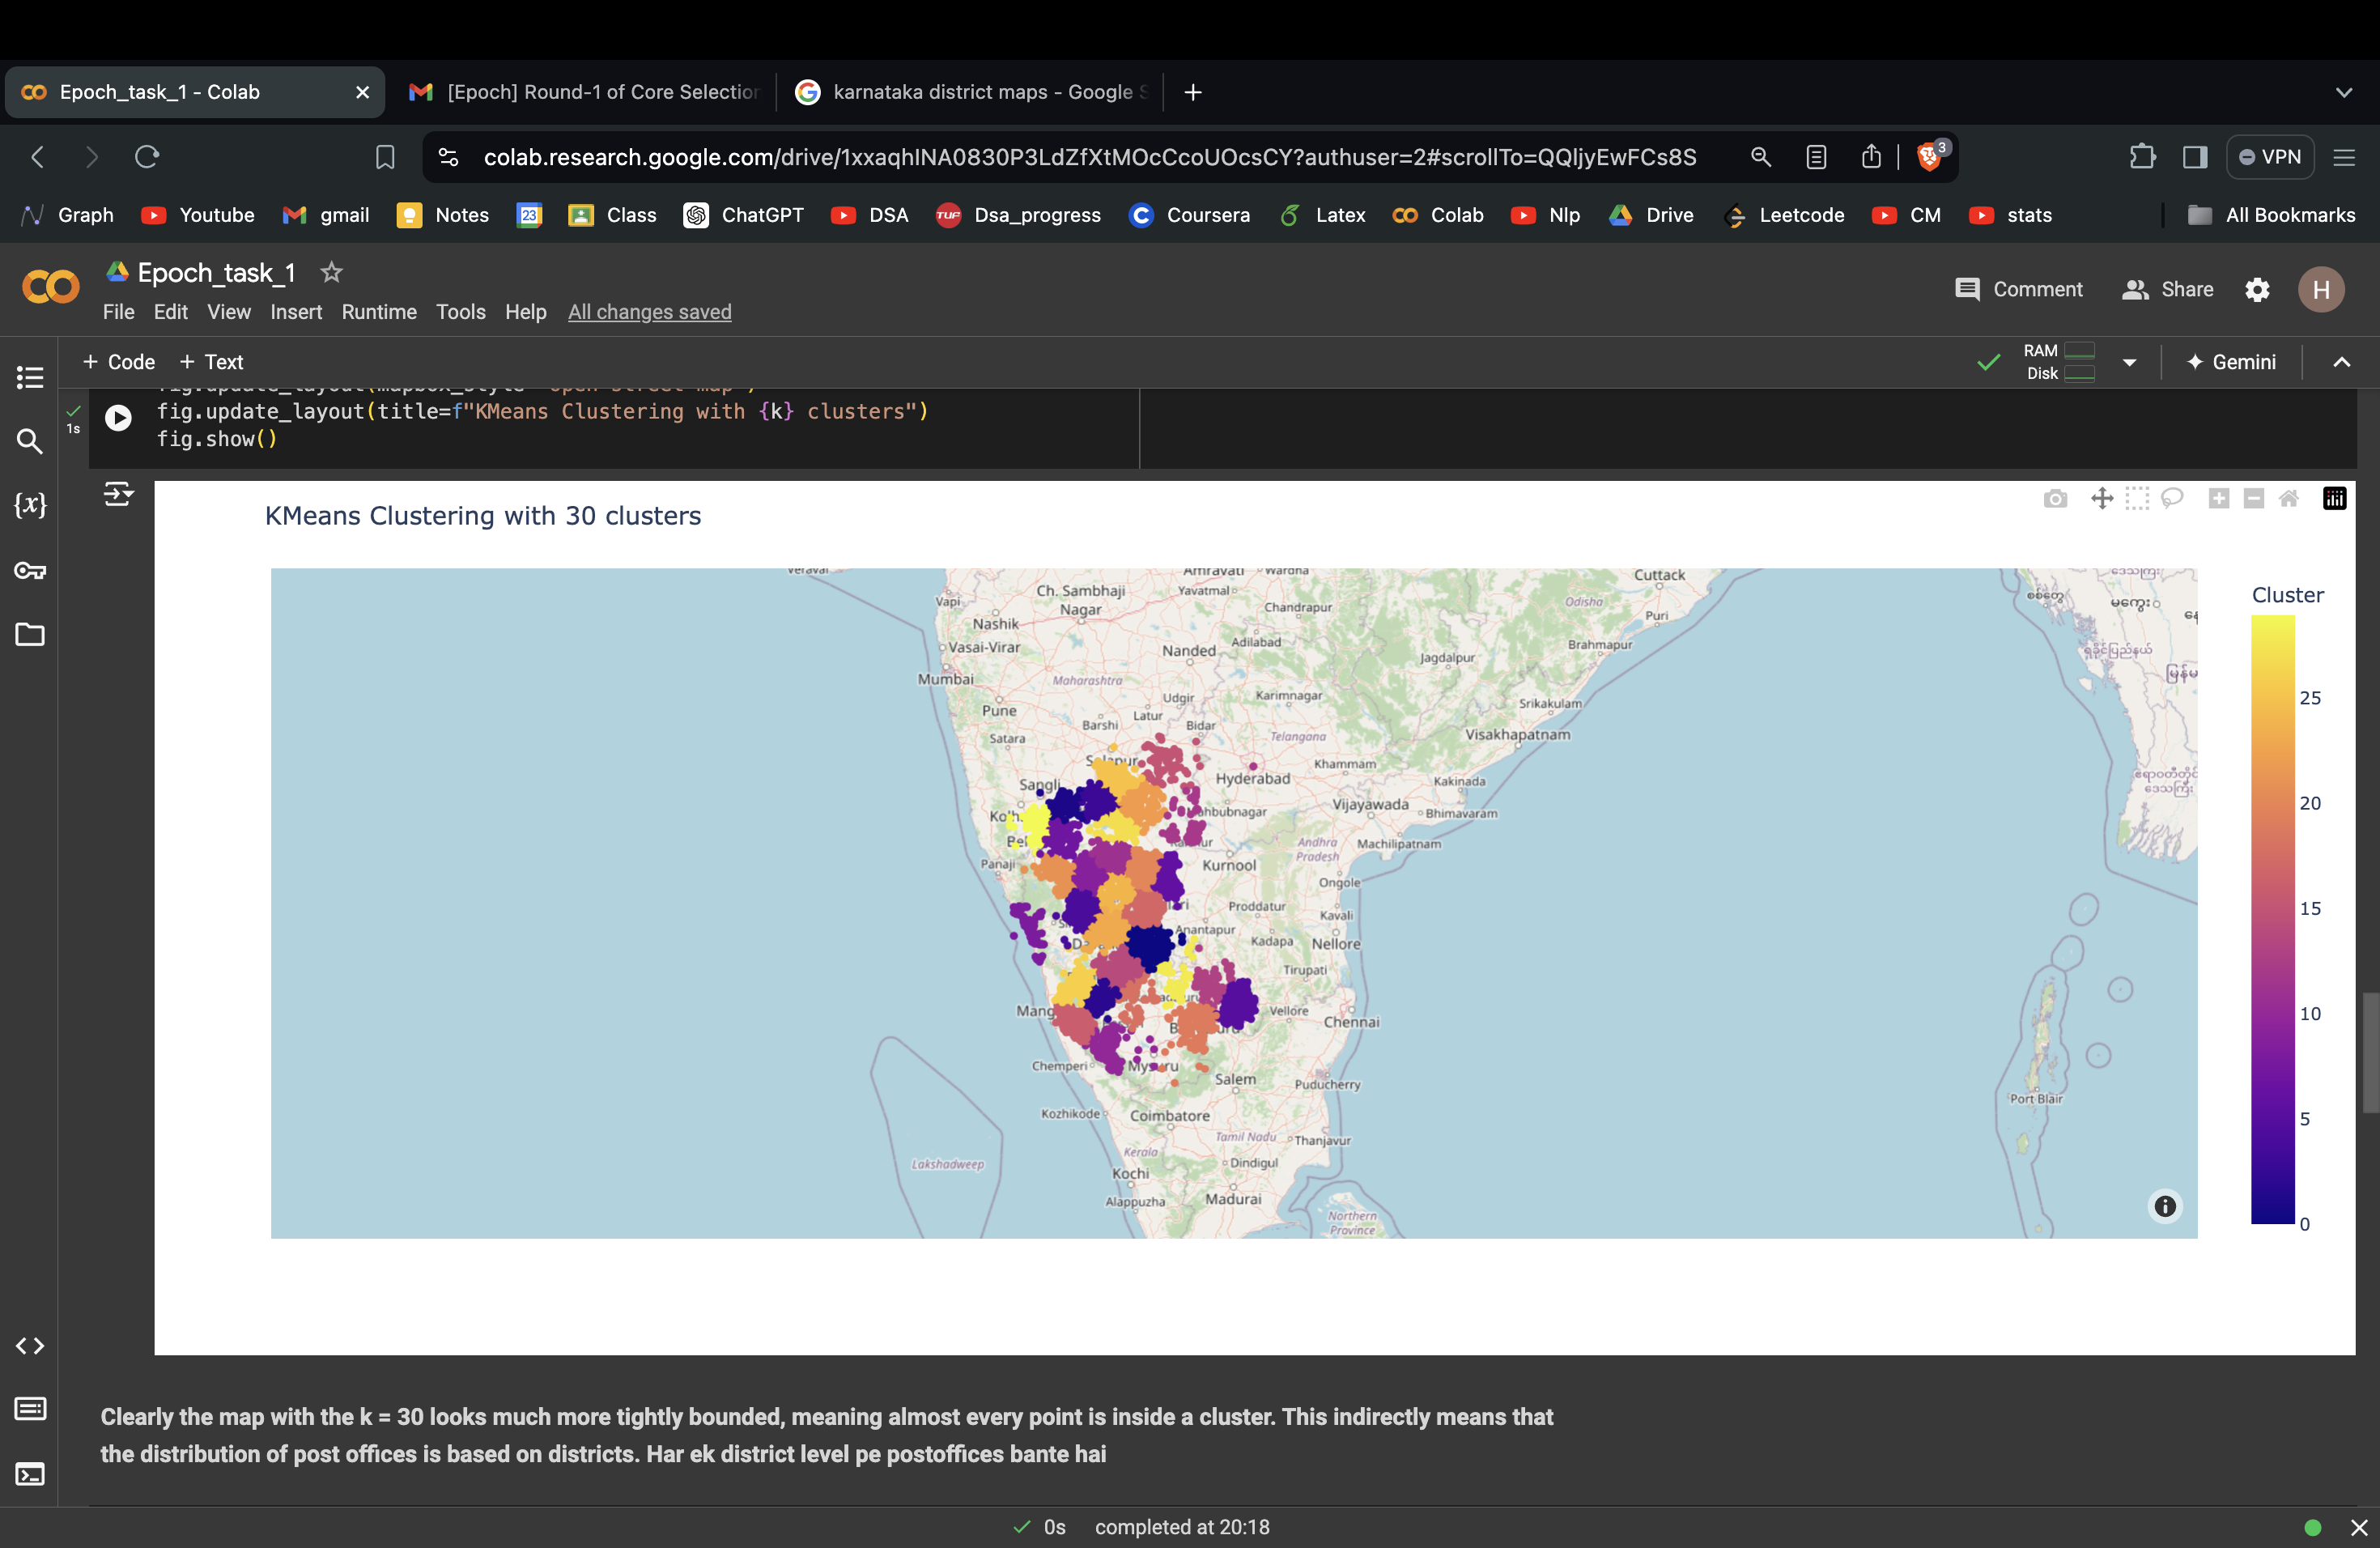

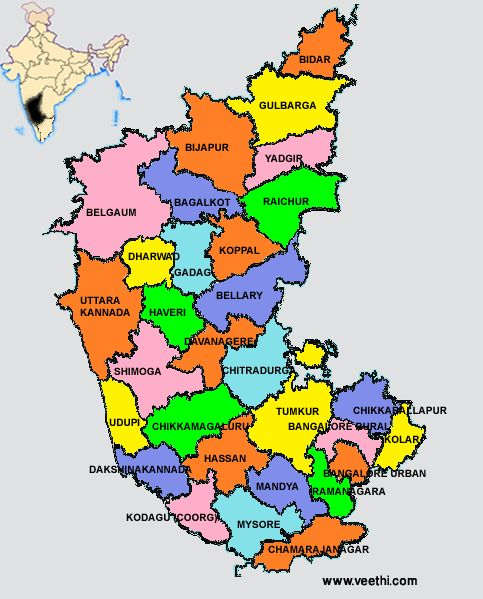